In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns
import plotly.graph_objects as go
from scipy.interpolate import griddata
import matplotlib.ticker as ticker
import shutil

from matplotlib.lines import Line2D
import moviepy as mpy
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [2]:
df = pd.read_csv('/Volumes/T7 Shield/Simulation Output/System 1/Sim 3.csv', header=0)

In [3]:
# Fill missing values in pos_rms column with 1
df['pos_rms'] = df['pos_rms'].fillna(1)
df['mag_rms'] = df['mag_rms'].fillna(6000)

In [4]:
df

,m,n,o,num_images,pos_rms,mag_rms,avg_mag_per,chi2,source_x,source_y,...,SIE_y,SIE_e,SIE_$θ_{e}$,SIE_$r_{core}$,"PERT_$z_{s,fid}$",PERT_x,PERT_y,PERT_$\gamma$,PERT_$θ_{\gamma}$,PERT_$\kappa$
0,0.001,0.00000,0.0,4,0.043036,615.198414,8161.287631,925.715400,20.80886,20.78564,...,20.78525,0.000009,3.982959,0.0,1.0,20.78,20.78,0.001,0.00000,0.0
1,0.001,36.03604,0.0,4,0.008230,7.378569,200.256801,194.056000,20.81218,20.77855,...,20.75888,0.120114,-5.126178,0.0,1.0,20.78,20.78,0.001,36.03604,0.0
2,0.001,72.07207,0.0,4,0.133134,835.938456,10093.840318,1486.781000,20.81026,20.78818,...,20.78862,0.000008,-0.171038,0.0,1.0,20.78,20.78,0.001,72.07207,0.0
3,0.001,108.10811,0.0,4,0.007726,6.929106,194.158927,174.763000,20.81240,20.77881,...,20.75849,0.125769,-4.010867,0.0,1.0,20.78,20.78,0.001,108.10810,0.0
4,0.001,144.14414,0.0,4,0.007721,7.308495,199.346824,172.432600,20.81233,20.77878,...,20.75896,0.119790,-3.871005,0.0,1.0,20.78,20.78,0.001,144.14410,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.100,215.85586,0.0,6,0.008970,4793.169462,39261.836537,221.660500,20.78565,20.77636,...,20.77488,0.261127,-53.489310,0.0,1.0,20.78,20.78,0.100,215.85590,0.0
999996,0.100,251.89189,0.0,4,0.020728,5.067883,81.169267,1305.922000,20.81088,20.77589,...,20.72077,0.480870,-10.261700,0.0,1.0,20.78,20.78,0.100,251.89190,0.0
999997,0.100,287.92793,0.0,4,0.010636,4.649924,75.002879,361.422400,20.82117,20.78070,...,20.72385,0.451156,5.669131,0.0,1.0,20.78,20.78,0.100,287.92790,0.0
999998,0.100,323.96396,0.0,6,0.000040,181.974808,2571.630648,0.014014,20.82619,20.78153,...,20.77498,0.259851,53.036410,0.0,1.0,20.78,20.78,0.100,323.96400,0.0


In [5]:
df['PERT_$θ_{\gamma}$'].unique()

array([  0.     ,  36.03604,  72.07207, 108.1081 , 144.1441 , 180.1802 ,
       216.2162 , 252.2523 , 288.2883 , 324.3243 ,   0.36036,  36.3964 ,
        72.43243, 108.4685 , 144.5045 , 180.5405 , 216.5766 , 252.6126 ,
       288.6486 , 324.6847 ,   0.72072,  36.75676,  72.79279, 108.8288 ,
       144.8649 , 180.9009 , 216.9369 , 252.973  , 289.009  , 325.0451 ,
         1.08108,  37.11712,  73.15315, 109.1892 , 145.2252 , 181.2613 ,
       217.2973 , 253.3333 , 289.3694 , 325.4054 ,   1.44144,  37.47748,
        73.51351, 109.5495 , 145.5856 , 181.6216 , 217.6577 , 253.6937 ,
       289.7297 , 325.7658 ,   1.8018 ,  37.83784,  73.87387, 109.9099 ,
       145.946  , 181.982  , 218.018  , 254.054  , 290.0901 , 326.1261 ,
         2.16216,  38.1982 ,  74.23423, 110.2703 , 146.3063 , 182.3423 ,
       218.3784 , 254.4144 , 290.4504 , 326.4865 ,   2.52252,  38.55856,
        74.59459, 110.6306 , 146.6667 , 182.7027 , 218.7387 , 254.7748 ,
       290.8108 , 326.8469 ,   2.88288,  38.91892, 

In [6]:
df = df[df['PERT_$θ_{\gamma}$'] == 120.3604]

In [7]:
df

,m,n,o,num_images,pos_rms,mag_rms,avg_mag_per,chi2,source_x,source_y,...,SIE_y,SIE_e,SIE_$θ_{e}$,SIE_$r_{core}$,"PERT_$z_{s,fid}$",PERT_x,PERT_y,PERT_$\gamma$,PERT_$θ_{\gamma}$,PERT_$\kappa$
340003,0.0010,120.36036,0.0,4,0.007645,7.053220,195.864598,172.0977,20.81239,20.77879,...,20.75863,0.123863,-3.859858,0.0,1.0,20.78,20.78,0.0010,120.3604,0.0
340013,0.0011,120.36036,0.0,4,0.007617,7.034747,195.621472,171.0631,20.81242,20.77884,...,20.75866,0.124088,-3.797478,0.0,1.0,20.78,20.78,0.0011,120.3604,0.0
340023,0.0012,120.36036,0.0,4,0.007610,6.966884,194.672082,170.0272,20.81244,20.77879,...,20.75849,0.124756,-3.741944,0.0,1.0,20.78,20.78,0.0012,120.3604,0.0
340033,0.0013,120.36036,0.0,4,0.007610,6.972431,194.753906,168.9950,20.81243,20.77880,...,20.75851,0.124799,-3.686213,0.0,1.0,20.78,20.78,0.0013,120.3604,0.0
340043,0.0014,120.36036,0.0,4,0.007560,6.896347,193.706300,167.9644,20.81248,20.77885,...,20.75846,0.125511,-3.626404,0.0,1.0,20.78,20.78,0.0014,120.3604,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349953,0.0996,120.36036,0.0,4,0.016621,2.823268,113.942379,833.6607,20.82120,20.77914,...,20.73870,0.350985,15.324010,0.0,1.0,20.78,20.78,0.0996,120.3604,0.0
349963,0.0997,120.36036,0.0,4,0.016620,2.825394,114.383607,836.1886,20.82110,20.77898,...,20.73863,0.350765,15.367390,0.0,1.0,20.78,20.78,0.0997,120.3604,0.0
349973,0.0998,120.36036,0.0,4,0.016667,2.825591,114.464972,838.6808,20.82125,20.77897,...,20.73864,0.350848,15.381830,0.0,1.0,20.78,20.78,0.0998,120.3604,0.0
349983,0.0999,120.36036,0.0,4,0.016701,2.825750,114.308014,841.2437,20.82124,20.77906,...,20.73869,0.351171,15.380350,0.0,1.0,20.78,20.78,0.0999,120.3604,0.0


In [7]:
x = df['PERT_$\gamma$'].values
y = df['SIE_e'].values
z = df['pos_rms'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

In [8]:
vmin = np.nanmin(zi[zi>0])
vmax = np.nanmax(zi)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

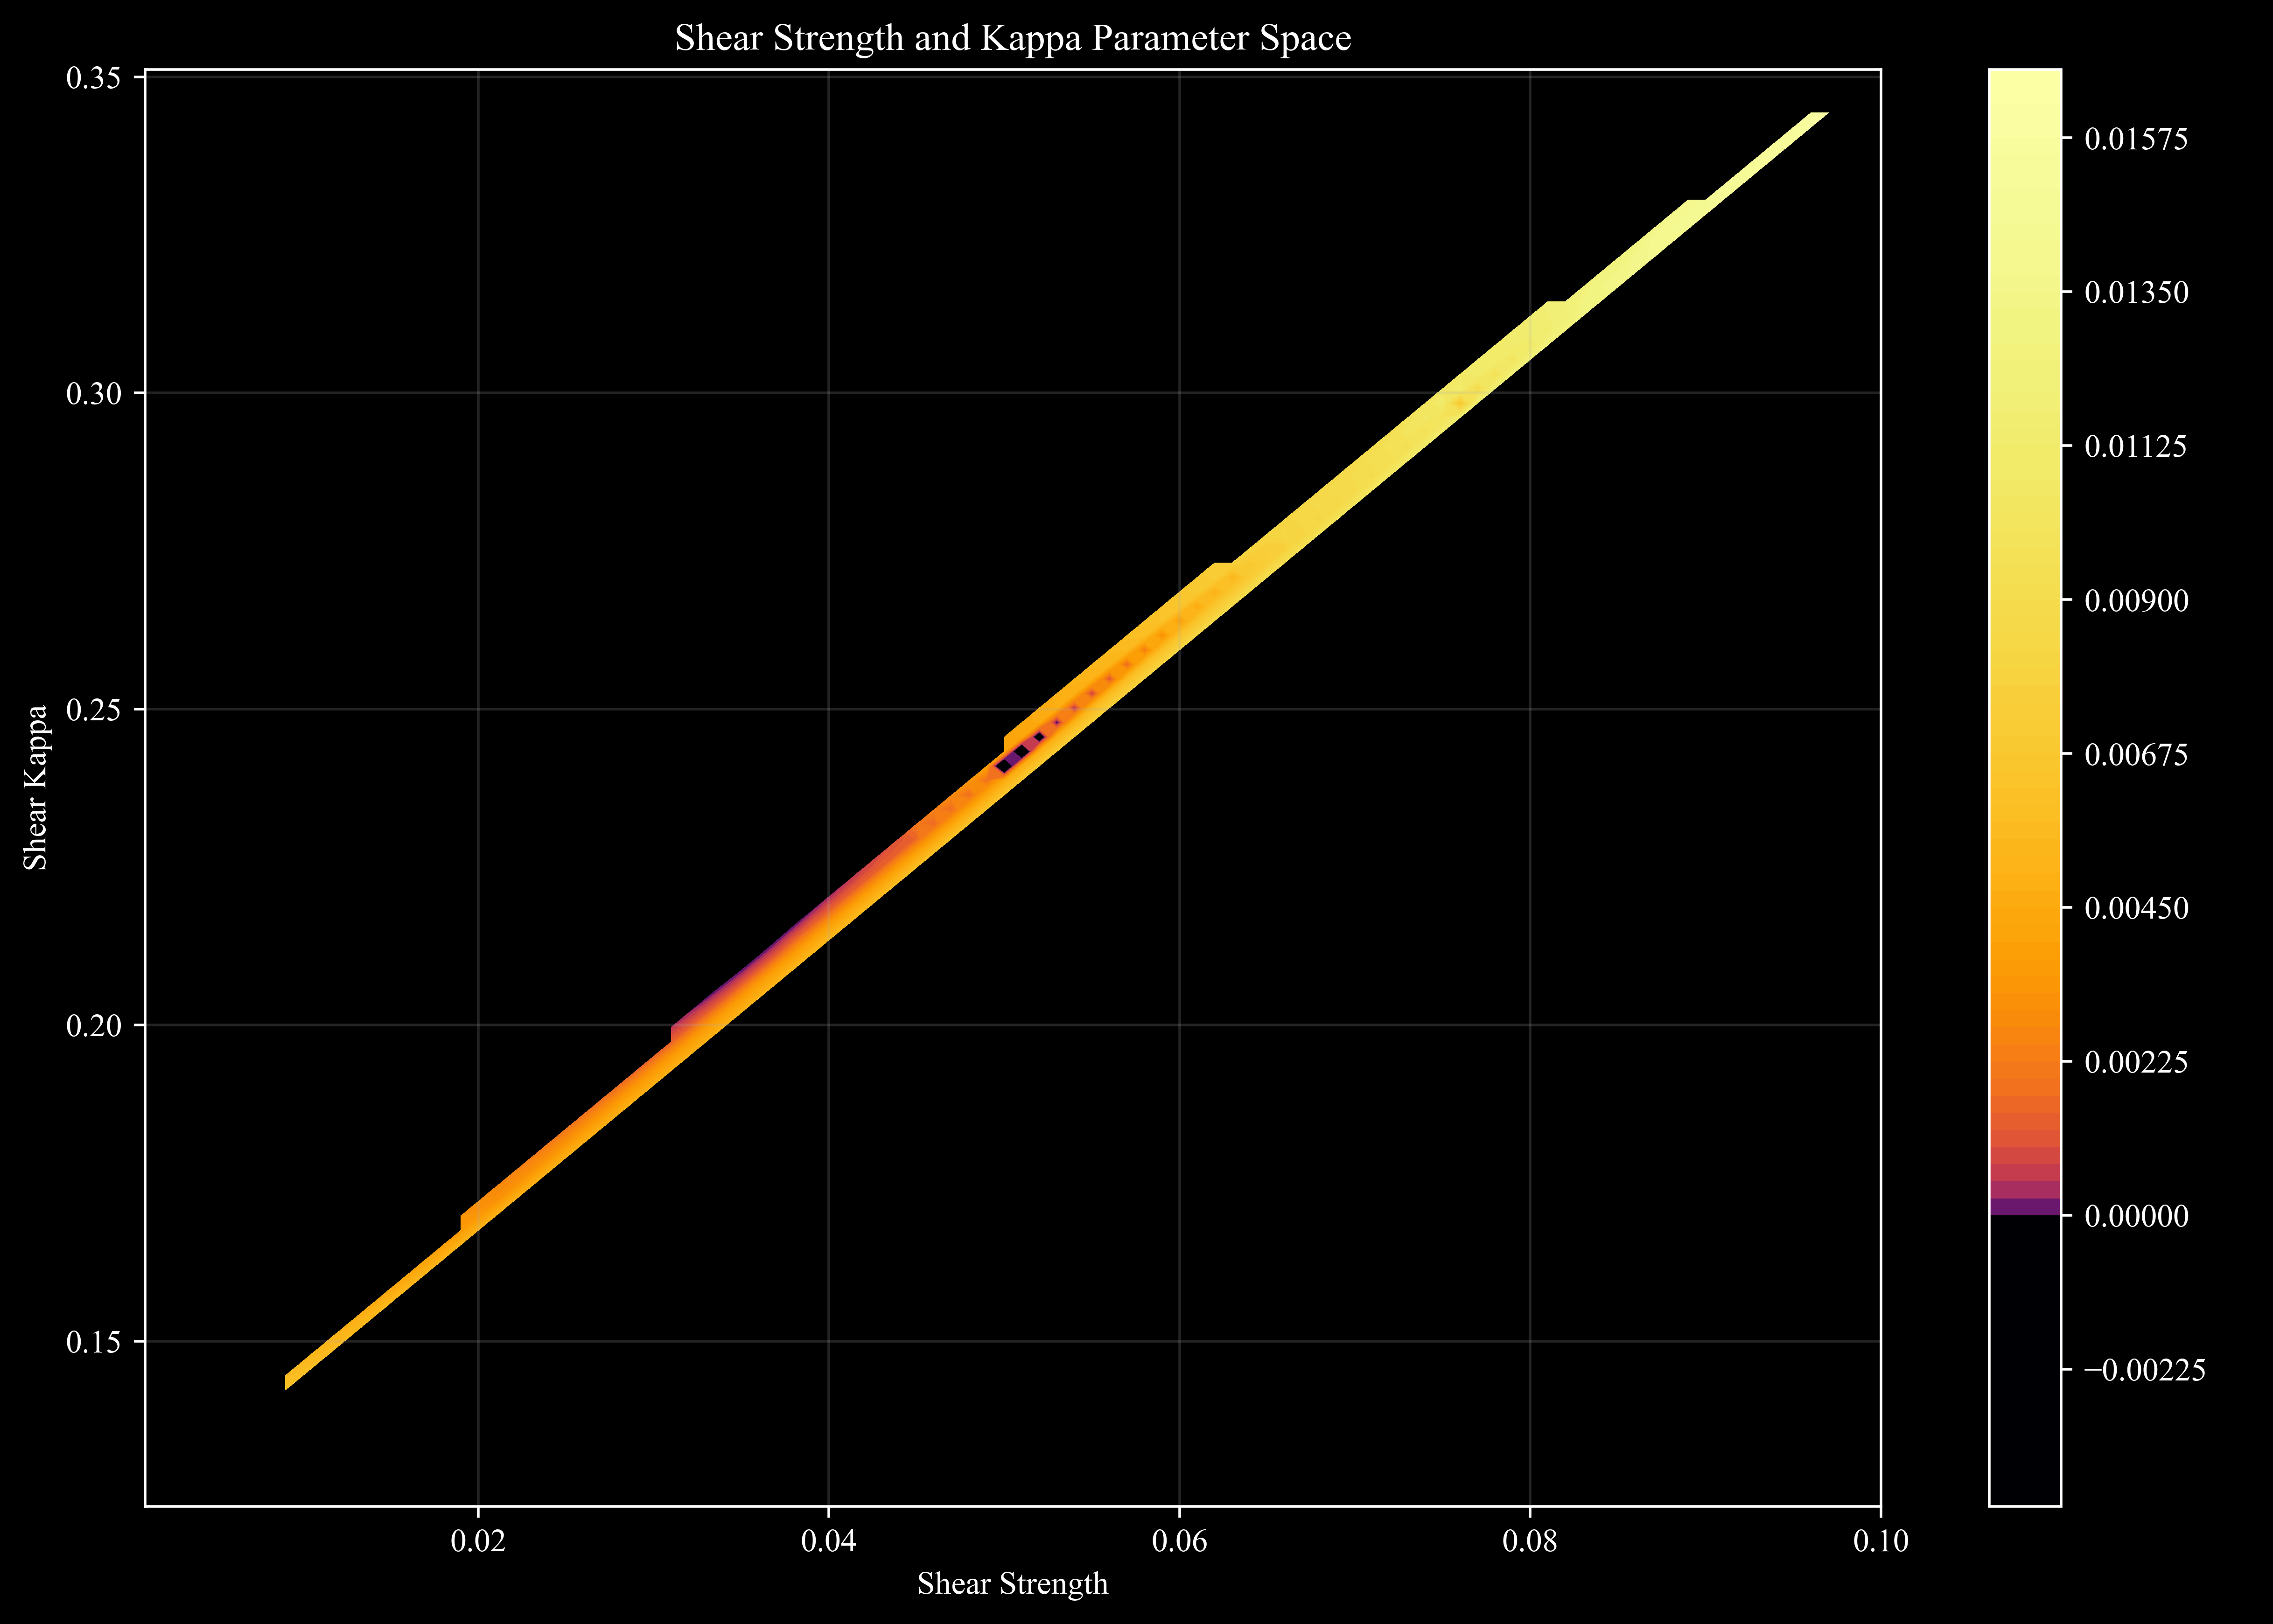

In [11]:
# Create the contour plot
plt.figure(figsize=(12, 8))

# Create the contour plot using the same data
contour = plt.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)

# Add a colorbar
plt.colorbar(contour, label='Position RMS')

# Set labels and title
plt.xlabel('Shear Strength', color = 'w')
plt.ylabel('Shear Kappa', color = 'w')
plt.title('Shear Strength and Kappa Parameter Space', color = 'w')

# Set the style for dark theme
plt.style.use('dark_background')
plt.grid(True, alpha=0.2)

# Show the plot
plt.show()


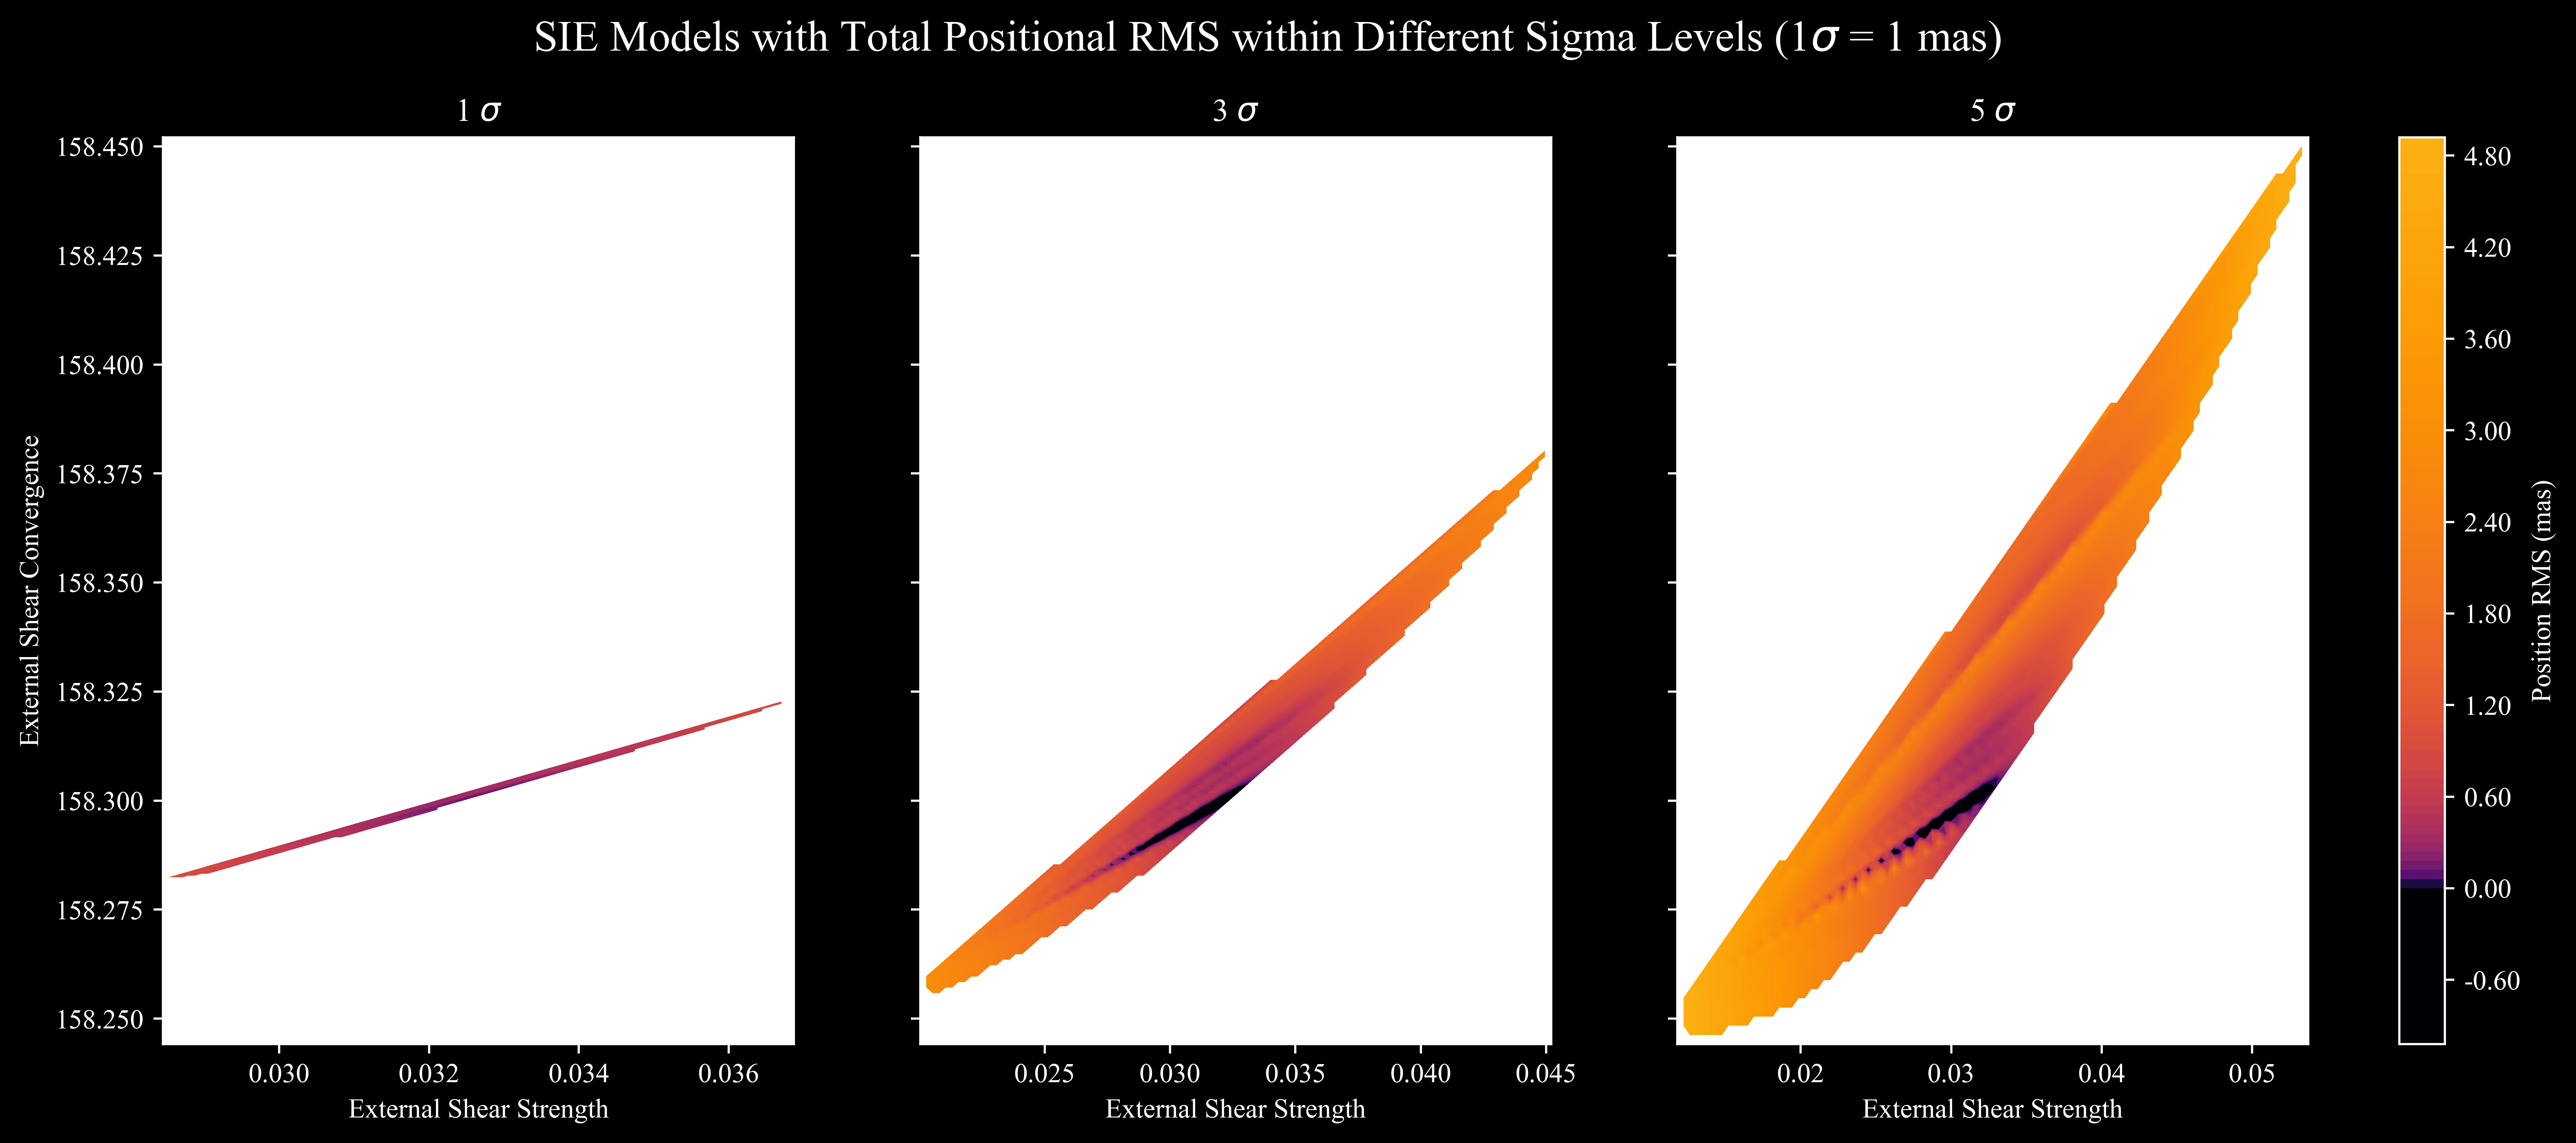

In [12]:
one_sigma = 0.001
sigma_levels = [1, 3, 5]
vmin = np.nanmin(zi[zi>0])
vmax = np.nanmax(zi)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

# Create a figure with subplots
fig, axes = plt.subplots(1, len(sigma_levels), figsize=(15, 6), sharey=True)

for i, ax in enumerate(axes):
    # Filter data based on sigma level
    mask = (df['pos_rms'] <= one_sigma * sigma_levels[i])
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['PERT_$\gamma$'].min(), filtered_df['PERT_$\gamma$'].max(), 100)
    yi = np.linspace(filtered_df['SIE_$\sigma$'].min(), filtered_df['SIE_$\sigma$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['PERT_$\gamma$'], filtered_df['SIE_$\sigma$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    # Create contour plot using the common norm
    contour = ax.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)
    
    ax.set_title(f'{sigma_levels[i]} $\sigma$', color='w')
    ax.set_xlabel('External Shear Strength', color='w')
    if i == 0:
        ax.set_ylabel('External Shear Convergence', color='w')
    ax.set_facecolor('white')
    ax.tick_params(colors='w')
    # ax.grid(True, alpha=0.2, color='k')

# Add common colorbar
cbar = fig.colorbar(contour, ax=axes, label='Position RMS (mas)', orientation='vertical', fraction=0.02, pad=0.04, format=ticker.FuncFormatter(lambda x, pos: f'{x*1000:.2f}'))
cbar.ax.yaxis.label.set_color('w')
cbar.ax.tick_params(colors='w')
plt.suptitle('SIE Models with Total Positional RMS within Different Sigma Levels (1$\sigma$ = 1 mas)', color='w', fontsize=16)
plt.show()

In [13]:
df

,m,n,o,num_images,pos_rms,mag_rms,avg_mag_per,chi2,source_x,source_y,...,SIE_y,SIE_e,SIE_$θ_{e}$,SIE_$r_{core}$,"PERT_$z_{s,fid}$",PERT_x,PERT_y,PERT_$\gamma$,PERT_$θ_{\gamma}$,PERT_$\kappa$
340003,0.0010,120.36036,0.0,4,0.007645,7.053220,195.864598,172.0977,20.81239,20.77879,...,20.75863,0.123863,-3.859858,0.0,1.0,20.78,20.78,0.0010,120.3604,0.0
340013,0.0011,120.36036,0.0,4,0.007617,7.034747,195.621472,171.0631,20.81242,20.77884,...,20.75866,0.124088,-3.797478,0.0,1.0,20.78,20.78,0.0011,120.3604,0.0
340023,0.0012,120.36036,0.0,4,0.007610,6.966884,194.672082,170.0272,20.81244,20.77879,...,20.75849,0.124756,-3.741944,0.0,1.0,20.78,20.78,0.0012,120.3604,0.0
340033,0.0013,120.36036,0.0,4,0.007610,6.972431,194.753906,168.9950,20.81243,20.77880,...,20.75851,0.124799,-3.686213,0.0,1.0,20.78,20.78,0.0013,120.3604,0.0
340043,0.0014,120.36036,0.0,4,0.007560,6.896347,193.706300,167.9644,20.81248,20.77885,...,20.75846,0.125511,-3.626404,0.0,1.0,20.78,20.78,0.0014,120.3604,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349953,0.0996,120.36036,0.0,4,0.016621,2.823268,113.942379,833.6607,20.82120,20.77914,...,20.73870,0.350985,15.324010,0.0,1.0,20.78,20.78,0.0996,120.3604,0.0
349963,0.0997,120.36036,0.0,4,0.016620,2.825394,114.383607,836.1886,20.82110,20.77898,...,20.73863,0.350765,15.367390,0.0,1.0,20.78,20.78,0.0997,120.3604,0.0
349973,0.0998,120.36036,0.0,4,0.016667,2.825591,114.464972,838.6808,20.82125,20.77897,...,20.73864,0.350848,15.381830,0.0,1.0,20.78,20.78,0.0998,120.3604,0.0
349983,0.0999,120.36036,0.0,4,0.016701,2.825750,114.308014,841.2437,20.82124,20.77906,...,20.73869,0.351171,15.380350,0.0,1.0,20.78,20.78,0.0999,120.3604,0.0


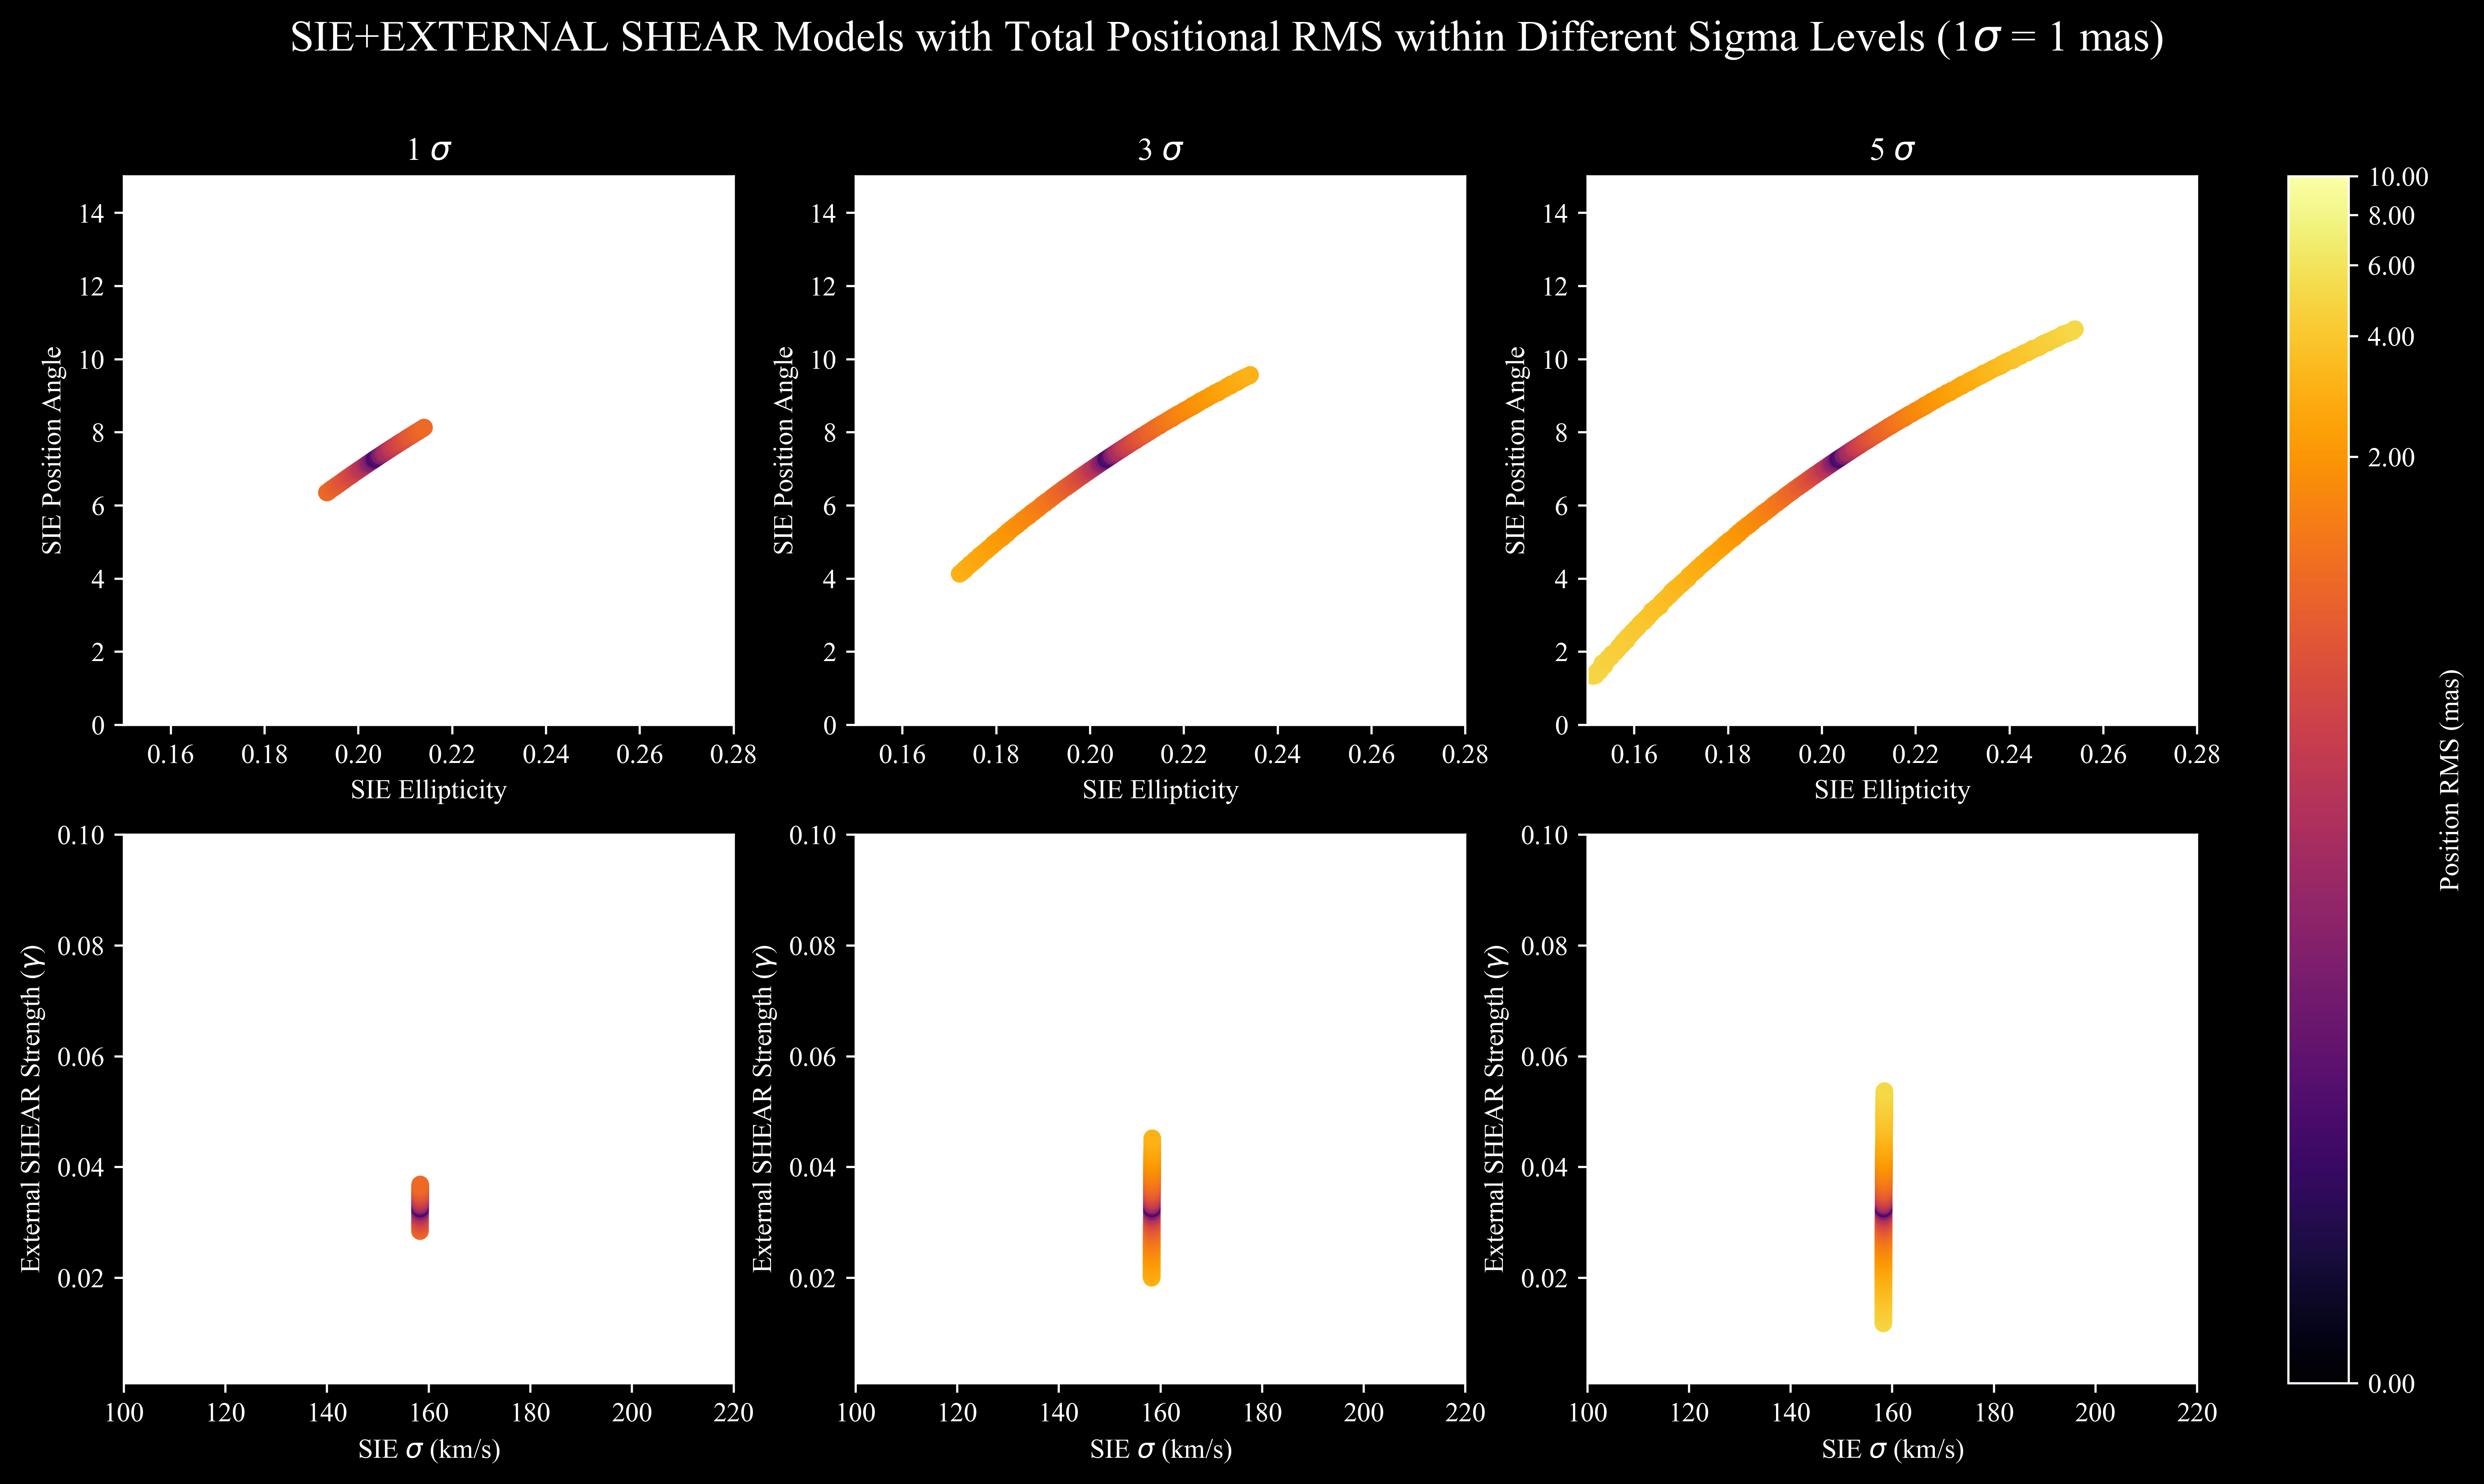

In [13]:
one_sigma = 0.001
sigma_levels = [1, 3, 5, 1, 3, 5]
vmin = 0
vmax = 0.01
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, ax in enumerate(axes.flatten()):

    # Filter data based on sigma level
    mask = (df['pos_rms'] <= one_sigma * sigma_levels[i])
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['SIE_e'].min(), filtered_df['SIE_e'].max(), 100)
    yi = np.linspace(filtered_df['SIE_$θ_{e}$'].min(), filtered_df['SIE_$θ_{e}$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['SIE_e'], filtered_df['SIE_$θ_{e}$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')

    if i < 3:
        # Create contour plot using the common norm
        ax.scatter(filtered_df['SIE_e'], filtered_df['SIE_$θ_{e}$'], c=filtered_df['pos_rms'], cmap='inferno', norm=norm, s=30)
        ax.set_xlabel('SIE Ellipticity', color='w')
        ax.set_ylabel('SIE Position Angle', color='w')
        ax.set_title(f'{sigma_levels[i]} $\sigma$', color='w')
        ax.tick_params(colors='w')
        ax.set_facecolor('white')
        ax.set_xlim(0.15, 0.28)
        ax.set_ylim(0, 15)
    if i > 2:
        ax.scatter(filtered_df['SIE_$\\sigma$'], filtered_df['PERT_$\\gamma$'], c=filtered_df['pos_rms'], cmap='inferno', norm=norm, s=30)
        ax.set_xlabel('SIE $\\sigma$ (km/s)', color='w')
        ax.set_ylabel('External SHEAR Strength ($\\gamma$)', color='w')
        ax.tick_params(colors='w')
        ax.set_facecolor('white')
        ax.set_xlim(100, 220)
        ax.set_ylim(0.001, 0.1)
    
    # ax.grid(True, alpha=0.2, color='k')

# Add common colorbar
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.05, pad=0.04, format=ticker.FuncFormatter(lambda x, pos: f'{x*1000:.2f}'))
cbar.set_label('Position RMS (mas)', color='w')
plt.suptitle('SIE+EXTERNAL SHEAR Models with Total Positional RMS within Different Sigma Levels (1$\sigma$ = 1 mas)', color='w', fontsize=16)
plt.show()

In [ ]:
one_sigma = 0.001
sigma_levels = [1, 3, 5]
vmin = np.nanmin(zi[zi>0])
vmax = np.nanmax(zi)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

# Create a figure with subplots
fig, axes = plt.subplots(1, len(sigma_levels), figsize=(15, 6), sharey=True)

for i, ax in enumerate(axes):
    # Filter data based on sigma level
    condition_img_1 = df['pos_rms_A'] <= one_sigma * sigma_levels[i]
    condition_img_2 = df['pos_rms_B'] <= one_sigma * sigma_levels[i]
    condition_img_3 = df['pos_rms_C'] <= one_sigma * sigma_levels[i]
    condition_img_4 = df['pos_rms_D'] <= one_sigma * sigma_levels[i]
    mask = condition_img_1 & condition_img_2 & condition_img_3 & condition_img_4
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['PERT_$\gamma$'].min(), filtered_df['PERT_$\gamma$'].max(), 100)
    yi = np.linspace(filtered_df['PERT_$\kappa$'].min(), filtered_df['PERT_$\kappa$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['PERT_$\gamma$'], filtered_df['PERT_$\kappa$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    # Create contour plot using the common norm
    contour = ax.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)
    
    ax.set_title(f'{sigma_levels[i]} $\sigma$', color='w')
    ax.set_xlabel('External Shear Strength', color='w')
    if i == 0:
        ax.set_ylabel('External Shear Convergence', color='w')
    ax.set_facecolor('white')
    ax.tick_params(colors='w')
    ax.set_xlim(0.001, 0.1)
    ax.set_ylim(-0.5, 0.5)
    # ax.grid(True, alpha=0.2, color='k')

# Add common colorbar
cbar = fig.colorbar(contour, ax=axes, label='Position RMS (mas)', orientation='vertical', fraction=0.02, pad=0.04, format=ticker.FuncFormatter(lambda x, pos: f'{x*1000:.2f}'))
cbar.ax.yaxis.label.set_color('w')
cbar.ax.tick_params(colors='w')
plt.suptitle('SIE Models with Each Image Positional RMS within Different Sigma Levels (1$\sigma$ = 1 mas)', color='w', fontsize=16)
plt.show()

In [ ]:
# Animation settings
if os.path.exists('frames'):
    shutil.rmtree('frames')
os.makedirs('frames')

fps = 20
duration = 10  # seconds
total_frames = int(duration * fps)
sigma_start = 0.1
sigma_end = 10

# Create array of sigma values for each frame
sigma_values = np.linspace(sigma_start, sigma_end, total_frames)

vmin = 1e-5
vmax = 0.01
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())


for i in range(len(sigma_values)):
    mask = (df['pos_rms'] <= one_sigma * sigma_values[i])
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['PERT_$\gamma$'].min(), filtered_df['PERT_$\gamma$'].max(), 100)
    yi = np.linspace(filtered_df['PERT_$\kappa$'].min(), filtered_df['PERT_$\kappa$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['PERT_$\gamma$'], filtered_df['PERT_$\kappa$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    plt.figure(figsize=(8, 10))
    plt.scatter(filtered_df['SIE_e'], filtered_df['SIE_$θ_{e}$'], c=filtered_df['pos_rms'], cmap='inferno', norm=norm, s=5)
    plt.xlabel('SIE Ellipticity', color='w')
    plt.ylabel('SIE Position Angle', color='w')
    plt.title(f'{sigma_values[i]:.2f} $\sigma$', color='w')
    plt.tick_params(colors='w')
    
    plt.savefig(f'frames/frame_{i:03d}.png')
    plt.close()

# Create the animation from the saved frames
frame_files = [f'frames/frame_{i:03d}.png' for i in range(len(sigma_values))]
clip = mpy.ImageSequenceClip(frame_files, fps=10)
clip.write_videofile("sigma_animation.mp4", codec="libx264")

# Clean up the frames directory
shutil.rmtree('frames')

In [ ]:
# Animation settings
if os.path.exists('frames'):
    shutil.rmtree('frames')
os.makedirs('frames')

fps = 20
duration = 10  # seconds
total_frames = int(duration * fps)
sigma_start = 0.1
sigma_end = 10

# Create array of sigma values for each frame
sigma_values = np.linspace(sigma_start, sigma_end, total_frames)

vmin = 1e-5
vmax = 0.01
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())


for i in range(len(sigma_values)):
    mask = (df['pos_rms'] <= one_sigma * sigma_values[i])
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['SIE_e'].min(), filtered_df['SIE_e'].max(), 100)
    yi = np.linspace(filtered_df['SIE_$θ_{e}$'].min(), filtered_df['SIE_$θ_{e}$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['SIE_e'], filtered_df['SIE_$θ_{e}$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    plt.figure(figsize=(8, 10))
    contour = plt.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)
    plt.title(f'{sigma_values[i]:.2f} $\sigma$', color='w')
    plt.xlabel('SIE Ellipticity', color='w')
    plt.ylabel('SIE Position Angle', color='w')
    plt.gca().set_facecolor('black')
    plt.gca().tick_params(colors='w')
    plt.xlim(0.16, 0.26)
    plt.ylim(-50, 50)

    
    # Correctly add colorbar using the local contour object
    cbar = plt.colorbar(contour, label='Position RMS (mas)', orientation='vertical', fraction=0.09, pad=0.04, format=ticker.FuncFormatter(lambda x, pos: f'{x*1000:.2f}'))
    cbar.ax.yaxis.label.set_color('w')
    cbar.ax.tick_params(colors='w')
    
    plt.savefig(f'frames/frame_{i:03d}.png')
    plt.close()

# Create the animation from the saved frames
frame_files = [f'frames/frame_{i:03d}.png' for i in range(len(sigma_values))]
clip = mpy.ImageSequenceClip(frame_files, fps=10)
clip.write_videofile("sie_param_animation.mp4", codec="libx264")

# Clean up the frames directory
shutil.rmtree('frames')